# OptKnock

In [25]:
# import cameo
# import cobra
# from cobra.io import read_sbml_model
# from cobra import Reaction, Metabolite

In [26]:
#call load_model
%run 00load_model.ipynb

In [27]:
essentiality = {}
importantgenes = {}
targetgenes = {}
for gene in model.genes:
  with model:
    gene.knock_out()
    essentiality[gene] = model.slim_optimize(error_value = 0.)
    if model.slim_optimize(error_value = 0.) < 0.5:
      importantgenes[gene] = model.slim_optimize(error_value = 0.)
    else:
      targetgenes[gene] = model.slim_optimize(error_value = 0.)

In [28]:
importantreactions = []
for gene in importantreactions:
  for reaction in gene.reactions:
    importantreactions.append(reaction)
importantreactions = list(set(importantreactions))

In [29]:
def get_blocked_reactions(model):
  fva_res = cobra.flux_analysis.flux_variability_analysis(model, fraction_of_optimum = 0)
  blocked = [
      model.reactions.get_by_id(reaction) for reaction, row in fva_res.iterrows()
      if (round(row["minimum"], 5) == round(row["maximum"],5) == 0)
  ]
  return blocked

In [30]:
blockedreactions = get_blocked_reactions(model)

In [31]:
cleaneduplist = [x.id for x in importantreactions if x not in blockedreactions]

In [32]:
from cameo.strain_design.deterministic import OptKnock

In [60]:
model.objective = model.reactions.DM_RED_c
model.reactions.BIOMASS_SCO_tRNA.lower_bound = 0

In [61]:
optknock = OptKnock(model, fraction_of_optimum = 0.6, exclude_reactions = cleaneduplist)

C:\Users\mirei\anaconda3\lib\site-packages\cameo\strain_design\deterministic\linear_programming.py:118: UserWarning: You are trying to run OptKnock with glpk_interface. This might not end well.
  warnings.warn("You are trying to run OptKnock with %s. This might not end well." %
C:\Users\mirei\anaconda3\lib\site-packages\cobra\core\group.py:107: UserWarning: need to pass in a list
  warn("need to pass in a list")



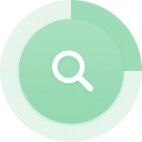

<IPython.core.display.Javascript object>

In [62]:
result = optknock.run(max_knockouts=1, target="DM_RED_c", biomass="BIOMASS_SCO_tRNA")

In [63]:
result

HBox()

In [67]:
result.reactions

AttributeError: 'OptKnockResult' object has no attribute 'reactions'

In [37]:
RED_production = model.optimize().objective_value
print("max. RED production [mmol gDW^-1 h^-1]:", RED_production)

max. RED production [mmol gDW^-1 h^-1]: 0.13190476190476216


In [64]:
medium = model.medium
with model:
    model.medium = medium
    model.reactions.get_by_id('GLNS').bounds = 0,0
    RED_production = model.optimize().objective_value
    print("max. RED production [mmol gDW^-1 h^-1]:", RED_production)

max. RED production [mmol gDW^-1 h^-1]: 0.13190476190476244
